In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
image_dir = "/kaggle/input/solar-panel-object-detection/image_chips_native-20250212T103727Z-001/image_chips_native"
tif_files = [f for f in os.listdir(image_dir) if f.endswith(".tif") and "(1)" not in f]

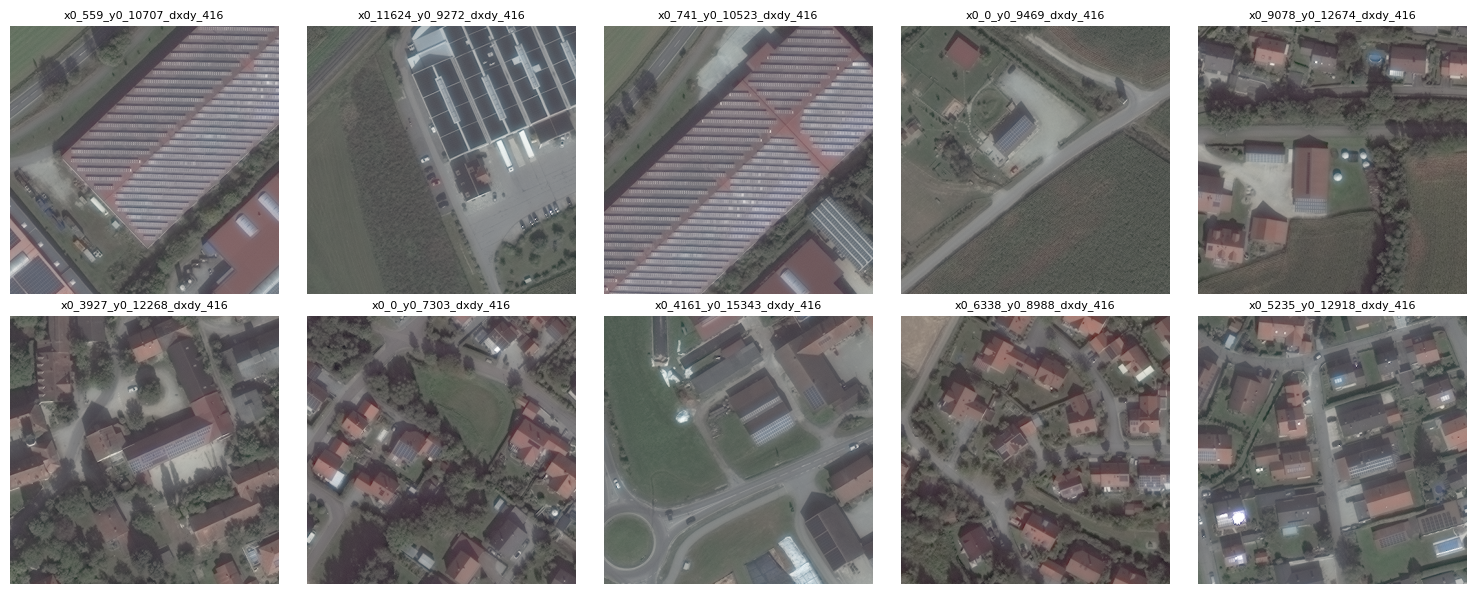

In [3]:
num_images = min(len(tif_files), 10)  

# Creating a 2x5 subplot
fig, axes = plt.subplots(2, 5, figsize=(15, 6)) 

for i, tif_file in enumerate(tif_files[:num_images]):
    img_path = os.path.join(image_dir, tif_file)

    # Reading the image using OpenCV
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"Failed to load {tif_file}")
        continue

    # Converting BGR to RGB for correct color display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Getting subplot row and column indices
    row, col = divmod(i, 5) 

    # Plotting the image
    axes[row, col].imshow(img)
    axes[row, col].axis("off") 
    axes[row, col].set_title(tif_file.split(".tif")[0][len("solarpanels_native_2"):].split("__")[1], fontsize=8)

plt.tight_layout()
plt.show()

# How many instances of solar panels are present in the dataset?

In [26]:
labels_dir = "/kaggle/input/solar-panel-object-detection/labels-20250212T103318Z-001/labels/labels_native"

In [7]:
label_file = tif_files[3].replace("tif","txt")
file_path = os.path.join(labels_dir, label_file)
solar_panels=0
with open(file_path, "r") as f:
    lines = f.readlines()
    solar_panels += len(lines)
print(f"{solar_panels} solar panel instances in the image.")

2 solar panel instances in the image.


In [9]:
label_files = [i.replace("tif","txt") for i in tif_files]
total_solar_panels = 0
duplicates = 0
for label_file in label_files:
    file_path = os.path.join(labels_dir, label_file)
    with open(file_path, "r") as f:
        lines = f.readlines()
        total_solar_panels += len(lines)
print(f"Total {total_solar_panels} solar panel instances are there in the dataset.")

Total 29625 solar panel instances are there in the dataset.


# Compute and show the value counts of labels per image. E.g., X images have 0 labels, Y images have 1 label, … and so on.

In [25]:
label_count = {}
label_files = [i.replace("tif","txt") for i in tif_files]

for label_file in label_files:
    file_path = os.path.join(labels_dir, label_file)
    with open(file_path, "r") as f:
        lines = f.readlines()
        flag = {}
        for i in range(len(lines)):
            label = lines[i][0]
            if label not in flag:
                flag[label] = 1
                if label not in label_count:
                    label_count[label] = 1
                else:
                    label_count[label] += 1
label_count

{'0': 2528, '2': 156, '1': 87}